#  llSPS-INT-2394-EDA-Loan-Status-Prediction
**By:-
    Gorantla Sasi Kumar,
    Hiren Suresh Ambekar,
    Shreeramdas Venkata Harendra,
    Sujay Sunil Pujari**

**1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2) Importing Dataset**

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**3) Taking care of null values**

In [5]:
#Showing count of missing values in each column
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
data.Gender = data.Gender.fillna('Male')

In [8]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
data.Married = data.Married.fillna('Yes')

In [10]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
data.Dependents = data.Dependents.fillna('0')

In [12]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [14]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [15]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [17]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [18]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [19]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**All null values removed**

**4) Data Visualization**

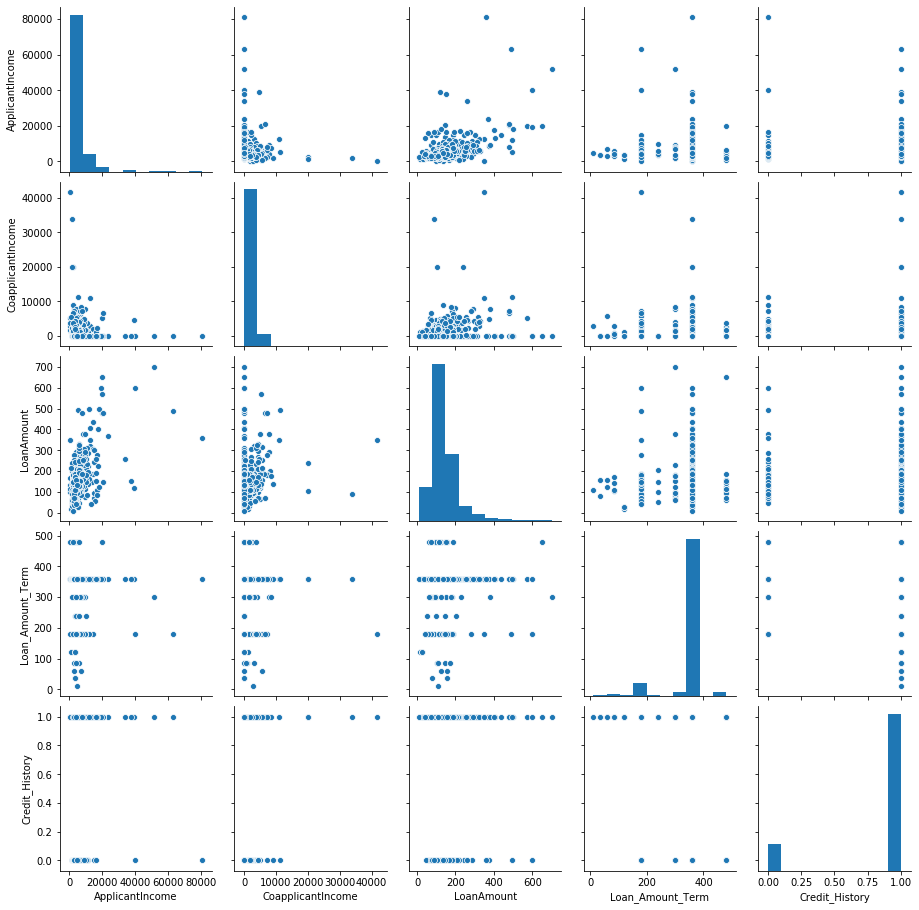

In [20]:
sns.pairplot(data)

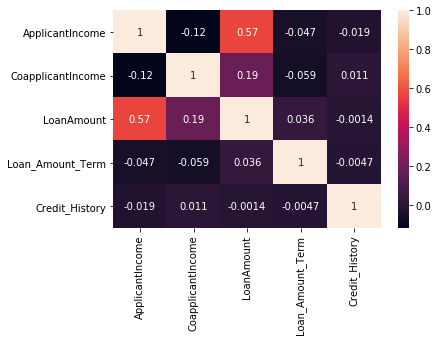

In [21]:
sns.heatmap(data.corr(), annot = True)

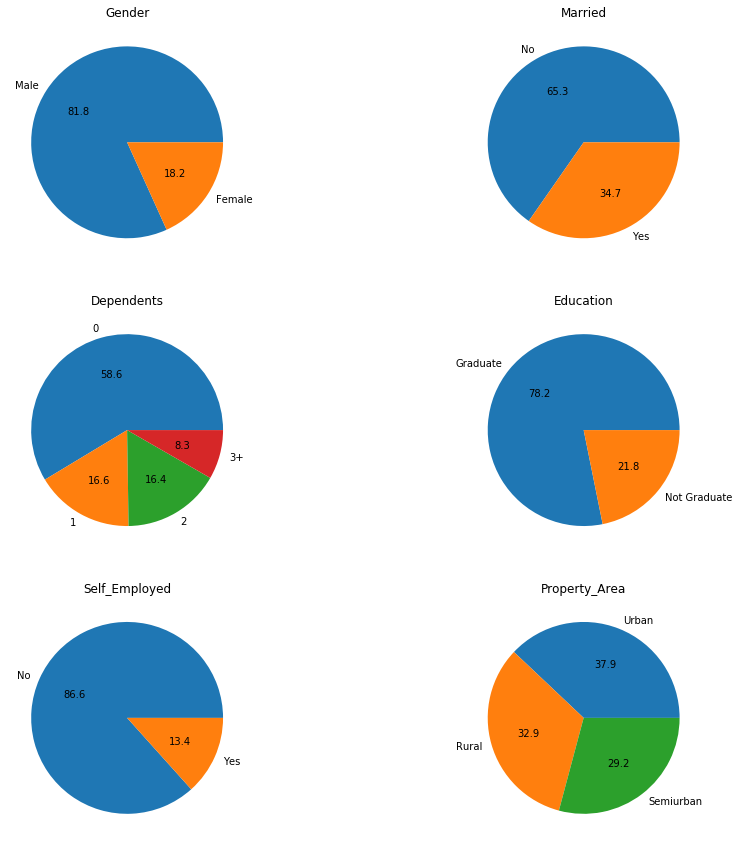

In [22]:
a = data["Gender"].value_counts().to_numpy()
b = data["Married"].value_counts().to_numpy()
c = data["Dependents"].value_counts().to_numpy()
d = data["Education"].value_counts().to_numpy()
e = data["Self_Employed"].value_counts().to_numpy()
f = data["Property_Area"].value_counts().to_numpy()

fig, axs = plt.subplots(3, 2, figsize = (15, 15))
_ = axs[0, 0].pie(a, labels = data["Gender"].unique(), autopct = '%0.1f')
axs[0, 0].set_title('Gender')
_ = axs[0, 1].pie(b, labels = data["Married"].unique(), autopct = '%0.1f')
axs[0, 1].set_title('Married')
_ = axs[1, 0].pie(c, labels = data["Dependents"].unique(), autopct = '%0.1f')
axs[1, 0].set_title('Dependents')
_ = axs[1, 1].pie(d, labels = data["Education"].unique(), autopct = '%0.1f')
axs[1, 1].set_title('Education')
_ = axs[2, 0].pie(e, labels = data["Self_Employed"].unique(), autopct = '%0.1f')
axs[2, 0].set_title('Self_Employed')
_ = axs[2, 1].pie(f, labels = data["Property_Area"].unique(), autopct = '%0.1f')
_ = axs[2, 1].set_title('Property_Area')

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


**5) Splitting in X and Y**

In [24]:
# Splitting traing data into X and Y
X = data.iloc[:, 1: 12].values
y = data.iloc[:, 12].values

In [25]:
X

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [26]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

**6) Label Encoding**

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
for i in range(0, 5):
    X[:,i] = le.fit_transform(X[:,i])

X[:,10] = le.fit_transform(X[:,10])
y = le.fit_transform(y)

In [29]:
X.shape

(614, 11)

**7) OneHot Encoding**

In [30]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(X[:,10:11]).toarray()
X = np.delete(X, 10, axis = 1)
X = np.concatenate((z,X), axis = 1)

In [31]:
X.shape

(614, 13)

**8) Splitting into train and test**

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [33]:
X_train.shape

(409, 13)

In [34]:
X_test.shape

(205, 13)

In [35]:
y_train.shape

(409,)

In [36]:
y_test.shape

(205,)

**9) Feature Scaling**

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Applying Principal Component analysis (PCA)**

Using to emphasize variation and bring out strong patterns in the dataset and make data easy to explore and visualize further in training and testing

In [38]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

# SVM

In [39]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
# Predicting test data
y_pred_svm=svm.predict(X_test)

In [41]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm)

0.7073170731707317

In [42]:
# roc auc
import sklearn.metrics as metrics
fpr_svm,tpr_svm,thrrshold_svm=metrics.roc_curve(y_test,y_pred_svm)
roc_auc_svm=metrics.auc(fpr_svm,tpr_svm)
roc_auc_svm

0.5

Text(0.5, 0, 'fpr')

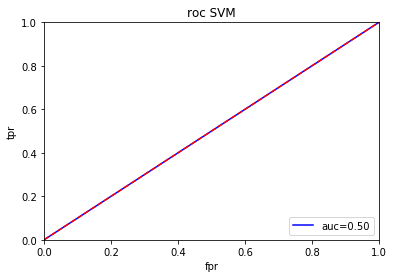

In [43]:
# Visualising roc auc
import matplotlib.pyplot as plt
plt.title('roc SVM')
plt.plot(fpr_svm,tpr_svm,'b',label='auc=%0.2f'%roc_auc_svm)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
# Predicting test data
y_pred_knn=knn.predict(X_test)

In [46]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)

0.5707317073170731

In [47]:
# roc auc
import sklearn.metrics as metrics
fpr_knn,tpr_knn,thrrshold_knn=metrics.roc_curve(y_test,y_pred_knn)
roc_auc_knn=metrics.auc(fpr_knn,tpr_knn)
roc_auc_knn

0.5402298850574714

Text(0.5, 0, 'fpr')

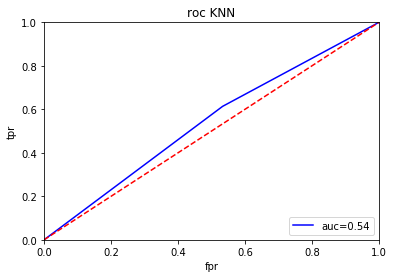

In [48]:
# Visualising roc auc
import matplotlib.pyplot as plt
plt.title('roc KNN')
plt.plot(fpr_knn,tpr_knn,'b',label='auc=%0.2f'%roc_auc_knn)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Predicting test data
y_pred_log=lgr.predict(X_test)

In [51]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_log)

0.6780487804878049

In [52]:
# roc auc
import sklearn.metrics as metrics
fpr_log,tpr_log,thrrshold_log=metrics.roc_curve(y_test,y_pred_log)
roc_auc_log=metrics.auc(fpr_log,tpr_log)
roc_auc_log

0.4939655172413793

Text(0.5, 0, 'fpr')

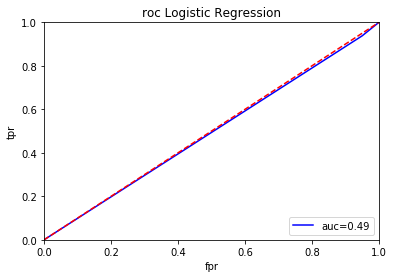

In [53]:
# Visualising roc auc
import matplotlib.pyplot as plt
plt.title('roc Logistic Regression')
plt.plot(fpr_log,tpr_log,'b',label='auc=%0.2f'%roc_auc_log)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')